<a href="https://colab.research.google.com/github/TedColburn/Furnace-Dev/blob/master/ROOM_TEMPERATURE_OPTIMIZATION_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algorithm:

repeat {
> Now := current time

> H := temperature history 

> with H and Now calculate durations:
>> 1. Actual_duration := time value N
>> 2. Temp_now, variance(T_now) := estimate current temperurature at time Now 
>> 3. If temp_now > target_temp skip to END_CONDITION
>> 4. Temp_before, variance(T_before) := estimate current temperurature at time at Now-Actual_duration
>> 5. Update Ideal_Curve() only free parameter is target_temp
>> 6. Deal with edge cases - e.g. temperature drops, temp_before > target_temp, etc.
>> 7. Ideal_duration = time at temp_now - time temp_before using the ideal curve 

> (insert Logic to prevent oscilation)

> with durations, calculate BTU levels: 

>>A :=  probability(Ideal_duration<Actual_duration)

>>B := probability(Ideal_duration==Actual_duration)

>>C :=  probability(Ideal_duration>Actual_duration)

>>D := argmax( A ,  B,  C) -- what has the highest probability?

>> if D == A then increase BTU value

>> elseif D == B then maintain current BTU value

>> elseif D == C then decrease BTU 

>> if Temp_now < target_temp then set BTU level minimum heating value

> END_CONDITION

> If temp_now > target_temp then set BTU level to 0

> wait(wait_duration)

}






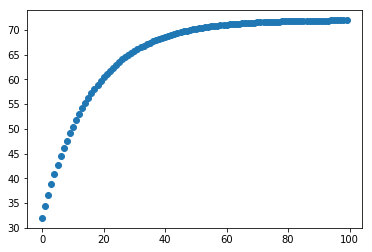

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit


def eq_ted(temp_now, temp_target, time_step=1.0, rate=0.06):
    dT = temp_target - temp_now
    t_next = temp_now + (time_step * dT * rate)
    return t_next
  
# lets set up some time steps
# a target temperature, and some temp as a starting point
# every time step relies on the past, so lets iterate through and calculate the temp

x = np.arange(100)
t_target = 72
t_now = 32
t = [32]

for step in range(len(x)-1):
    t_next = eq_ted(t_now, t_target)
    t.append(t_next)
    t_now = t_next
    
    
plt.scatter(x, t)



This is an example of an exponential decay function, the closed form solution is:

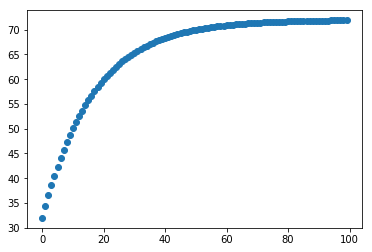

In [0]:
def ideal_curve(temp_target, elapsed_time, initial_temp = 0, rate=0.06):
    return temp_target - ((temp_target-initial_temp) * np.exp(-elapsed_time * rate))
  

t_ideal = ideal_curve(t_target, x, initial_temp=32)

plt.scatter(x, t_ideal)


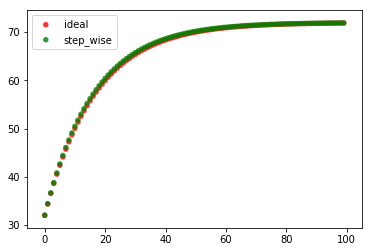

In [0]:
def scatter(x, t, ts, groups = ("ideal", "step_wise")):

    g1 = (x,t)
    g2 = (x,ts)
    data = (g1, g2)
    colors = ("red", "green" )
   

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    for data, color, group in zip(data, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.legend(loc=2)
    plt.show()
    
scatter(x, t_ideal, t)
    

There is a little difference due to the closed form solution vs the iterative summation

Given the current temperature we can also compute a previous temperature in the past
Simply re-arrange the equation.

Of course this will extrapolate far beyone reality to below absolute zero values.


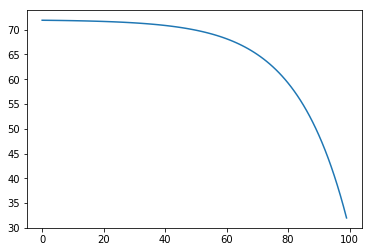

In [0]:
def initial_temp(temp_target, elapsed_time, temp_now, rate=0.06):
    return temp_now*np.exp(elapsed_time*rate) - temp_target*np.exp(elapsed_time*rate) + temp_target
  

t_prior = initial_temp(t_target, x, t_ideal[-1] )

# plot the values - note the reverse order
plt.plot(t_prior)



